In [1]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


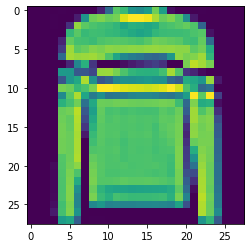

In [12]:
import pandas as pd
import numpy as np

plt.imshow(x_train[5])

In [23]:
x_train = x_train/255.0
x_test = x_test/255.0

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [24]:
import cv2 as cv

cv.imshow('', x_train[0])
cv.waitKey(0)
cv.destroyAllWindows()

In [25]:
x_train[0].shape

(28, 28, 1)

In [26]:
x_train.shape

(60000, 28, 28, 1)

In [37]:
with tf.device('gpu'):
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1)),
        keras.layers.MaxPool2D((2,2), strides=2),
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(10, activation='softmax')
    ])

In [38]:
with tf.device('gpu'):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               1384704   
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)               

In [40]:

model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 46s 759us/step - loss: 0.4630 - acc: 0.8373 - val_loss: 0.3212 - val_acc: 0.8828
Epoch 2/5
60000/60000 [==============================] - 44s 738us/step - loss: 0.3010 - acc: 0.8932 - val_loss: 0.3024 - val_acc: 0.8904
Epoch 3/5
60000/60000 [==============================] - 44s 735us/step - loss: 0.2453 - acc: 0.9123 - val_loss: 0.2718 - val_acc: 0.9042
Epoch 4/5
60000/60000 [==============================] - 44s 737us/step - loss: 0.2122 - acc: 0.9245 - val_loss: 0.2631 - val_acc: 0.9089
Epoch 5/5
60000/60000 [==============================] - 44s 735us/step - loss: 0.1862 - acc: 0.9324 - val_loss: 0.2830 - val_acc: 0.9117


In [41]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 112us/step
Test accuracy: 0.9117


In [42]:
predictions = model.predict(x_test)

In [34]:
predictions[4]

array([2.54400377e-03, 1.01080455e-09, 6.83386636e-04, 1.23253603e-05,
       6.56788005e-04, 1.00405136e-11, 9.96098995e-01, 3.02821900e-11,
       4.52528730e-06, 8.60601260e-12], dtype=float32)

In [35]:
cv.imshow('', x_test[4])
cv.waitKey(0)
cv.destroyAllWindows()

In [36]:
y_test[4]

6